*Importing necessary libraries *

In [2]:
import numpy as np    #numpy is a library for making computations
import matplotlib.pyplot as plt    #it is a 2D plotting library
import pandas as pd    # pandas is mainly used for data analysis
import seaborn as sns    # data visualization library
%matplotlib inline 

In [3]:
df=pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
X=df.iloc[:,:-1].values
#Storing the column 1 in X and column 2 in y
y=df.iloc[:,:1].values

**Visualization of the Dataset to understand the data in a better way**

c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience'>

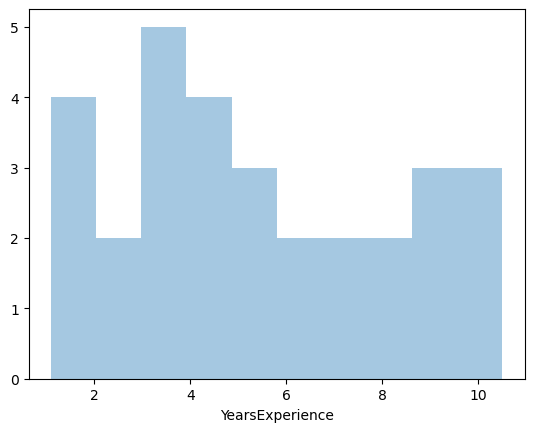

In [5]:
sns.distplot(df['YearsExperience'],kde=False,bins=10)
#This plot is used to represent univariate distribution of observations

<AxesSubplot:xlabel='count', ylabel='YearsExperience'>

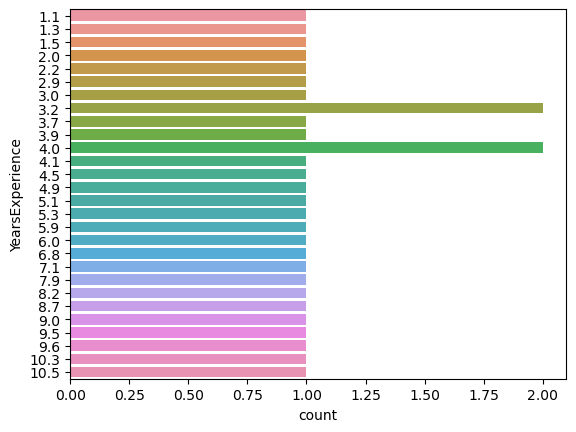

In [6]:
#Show the counts of observations in each categorical bin using bars
sns.countplot(y='YearsExperience',data=df)

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

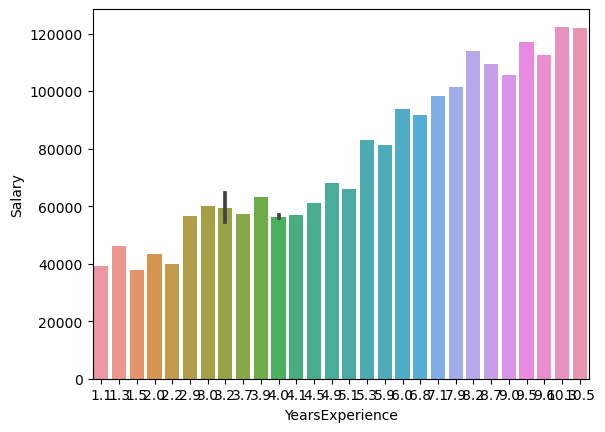

In [7]:
#Plotting a barplot
sns.barplot(x='YearsExperience',y='Salary',data=df)

<AxesSubplot:>

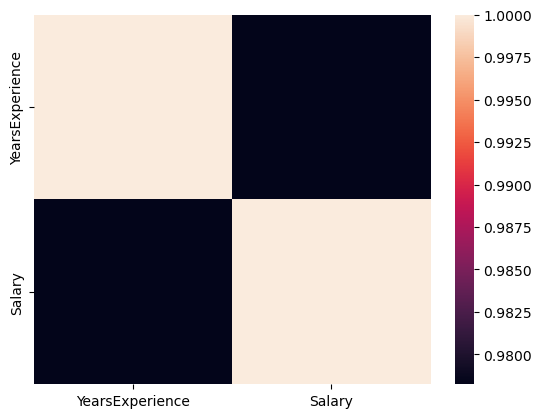

In [8]:
#Representing the correlation among the columns using a heatmap
sns.heatmap(df.corr())

c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

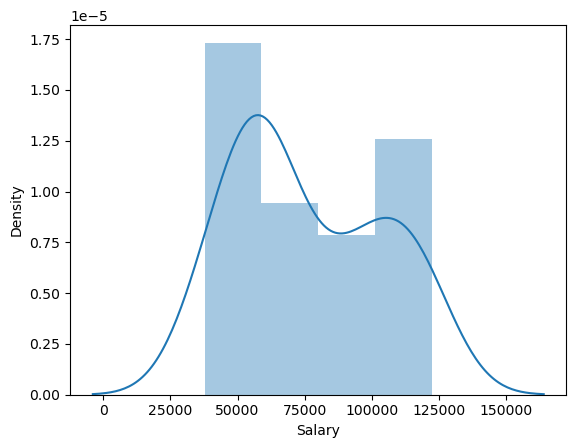

In [9]:
sns.distplot(df.Salary)

***Now we will use the scikit learn package to create the Linear Regression model***

Split the data into training and testing set

In [10]:
from sklearn.model_selection import train_test_split
#splitting the data using this module and setting the test size as 1/3 . Rest 2/3 is used for training the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=0)


**Creating the Linear Regression Model and Fitting the training data**

In [11]:
#importing the linear regression model
from sklearn.linear_model import LinearRegression
#creating the model
lr=LinearRegression()


In [12]:
lr.fit(X_train,y_train)
#fitting the training data


LinearRegression()

In [13]:
X_train.shape 
#Counting the number of observations in the training data

(20, 1)

In [14]:
y_train.shape


(20, 1)

**Predicting the Test Results**

In [15]:
y_pred=lr.predict(X_test)
y_pred
#Predicted data

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7],
       [ 9.6],
       [ 4. ],
       [ 5.3],
       [ 7.9]])

**Visualizing the training data**

Plotting the actual y training values VS the y values predicted by the model using training data

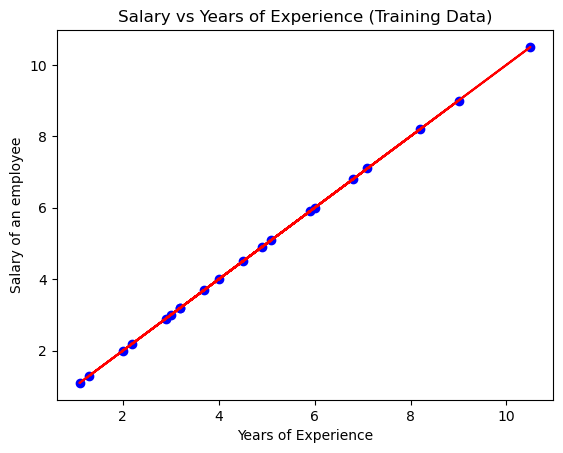

In [16]:
plt.scatter(X_train,y_train,color='blue')
plt.plot(X_train,lr.predict(X_train),color='red')
plt.title('Salary vs Years of Experience (Training Data)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary of an employee')
plt.show()

We see that the data is fitted so well and the predicted and actual data is almost the same

**Visualizing the Test Data**

Plotting the y test data vs y predicted data

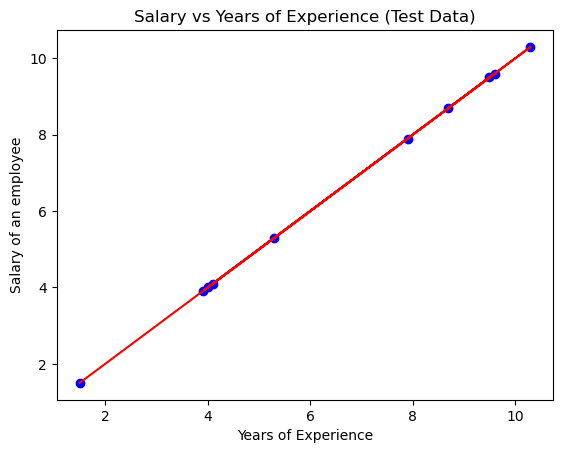

In [17]:
plt.scatter(X_test,y_test,color='blue')
plt.plot(X_test,lr.predict(X_test),color='red')
plt.title('Salary vs Years of Experience (Test Data)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary of an employee')
plt.show()

We see that the predicted data fits the regression line so well

**Calculating the errors so as to check the difference between the actual value and predicted model value... There are certain metrics to find these error such as Mean Squared Error, Root Mean Squared Error and Mean Absolute Error****

In [18]:
from sklearn import metrics
print('Mean Absolute Error of the Model:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error of the Model: ',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error of the Model: ',np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

Mean Absolute Error of the Model: 2.886579864025407e-16
Mean Squared Error of the Model:  3.7963931063761194e-31
Root Mean Squared Error of the Model:  1.698993779866603e-08


Looking at the values we see  that the error is very minute and hence we can see our model gives very accurate values

In [19]:
from sklearn.metrics import r2_score

In [20]:
r2_score(y_test,y_pred)
#This shows that our model is completely accurate
#R value lies between 0 to 1. Value of 1 represents it is completely accurate

1.0